### Importando as bibliotecas

In [1]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# blibliotecas para balanceamento dos dados
from imblearn.under_sampling import RandomUnderSampler, TomekLinks

# biblioteca para separação dos dados de treinamento e teste
from sklearn.model_selection import train_test_split

# biblioteca de accuracy
from sklearn.metrics import accuracy_score

# biblioteca para criação do modelo de RandomForest
from sklearn.ensemble import RandomForestClassifier

# bibliotecas de matriz de confusão
from sklearn.metrics import confusion_matrix, classification_report

### Coletando os dados

In [2]:
df = pd.read_csv('./dataset/HR_comma_sep.csv', sep=',')

### Análise descritiva - Verificando dados do dataset

In [3]:
# Exibindo quantidade de linhas e colunas.
df.shape

(14999, 10)

In [4]:
# Exibindo informações da base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# Visualizando as primeiras linhas do dataset
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
# Visualozando as ultimas linhas do dataset
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [7]:
# Informações quantitativas do dataset
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Tratamento de dados duplicados

In [36]:
# Exibindo os primeiros registros dos dados duplicados no dataset
df[df.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [37]:
# Contando a quantidade de dados duplicados no Dataset
df[df.duplicated()].count()

satisfaction_level       3008
last_evaluation          3008
number_project           3008
average_montly_hours     3008
time_spend_company       3008
Work_accident            3008
left                     3008
promotion_last_5years    3008
department               3008
salary                   3008
dtype: int64

In [38]:
# Removendo dados duplicados do dataset
df.drop_duplicates(inplace=True)

In [39]:
# Contando a quantidade de dados duplicados no Dataset após limpar.
df[df.duplicated()]['satisfaction_level'].count()

0

### Tratamento de dados ausente

In [40]:
# Verifica se existem dados ausentes - Não temos
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Modificando tipos de dados das colunas de departement e salary para utilizar nos calculos
***

In [10]:
# Exibindo dados como estavam ao carregar base
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
# modificando dados da coluna 'salary', onde low=0 | medium=1 | high=2
df.loc[df['salary'] == 'low', 'salary'] = 0
df.loc[df['salary'] == 'medium', 'salary'] = 1
df.loc[df['salary'] == 'high', 'salary'] = 2

df['salary'] = pd.to_numeric(df['salary'])

In [12]:
# Exibindo dados com coluna 'salary' alterada
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [117]:
from sklearn.preprocessing import LabelEncoder

# Instanciando o LabelEncoder
le = LabelEncoder()

# Para cada coluna categórica, ajuste e transforme os dados
categorical_columns = ['department', 'salary']  # Substitua pelo nome real das suas colunas categóricas
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [118]:
# Exibindo dados com coluna 'department' alterada
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


In [119]:
# Exibindo informações da base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  int64  
 9   salary                 14999 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


### Balanceamento de dados
***

In [120]:
# Pegando dados de análise e removendo coluna que indica o resultado a ser buscado. 
X_dados = df.drop('left', axis=1).values
X_dados

array([[0.38, 0.53, 2.  , ..., 0.  , 0.  , 0.  ],
       [0.8 , 0.86, 5.  , ..., 0.  , 0.  , 1.  ],
       [0.11, 0.88, 7.  , ..., 0.  , 0.  , 1.  ],
       ...,
       [0.37, 0.53, 2.  , ..., 0.  , 4.  , 0.  ],
       [0.11, 0.96, 6.  , ..., 0.  , 4.  , 0.  ],
       [0.37, 0.52, 2.  , ..., 0.  , 4.  , 0.  ]])

In [121]:
# Separando coluna com resultado esperado para comparação a análise do algoritmo.
y_dados = df['left'].values
y_dados

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [122]:
# Criando função para balancear os dados
def balanceamento_dados(X_dados, y_dados):
    undersample = RandomUnderSampler(random_state = 42)
    X_under, y_under = undersample.fit_resample(X_dados, y_dados)
    
    tl = TomekLinks(sampling_strategy='all') #trabalha com outliers
    X_under, y_under  = tl.fit_resample(X_under, y_under)
    return X_under, y_under

In [123]:
# Aplicando técnica de balanceamento de dados 
X_dados_balanceados, y_dados_balanceados = balanceamento_dados(X_dados, y_dados)

In [124]:
# Verificando resultado do balanceamento feito
print(len(X_dados_balanceados), len(y_dados_balanceados))

7048 7048


### Realizando separação dos dados de treinamento e teste
***

In [125]:
# Criando função para realizar separação dos dados de treinamento e teste.
def separa_treino_teste(X_dados_balanceados, y_dados_balanceados):
    X_train, X_test, y_train, y_test = train_test_split(X_dados_balanceados, y_dados_balanceados, random_state=42, test_size =0.3)
    return X_train, X_test, y_train, y_test

In [126]:
#Separando conjuntos de treino e teste 
X_train, X_test, y_train, y_test = separa_treino_teste(X_dados_balanceados, y_dados_balanceados)

### Criando modelo de RandomForest
***

In [127]:
# Cria o classificador Random Forest
classifier = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=100)

#Cria o modelo de classificação
modelo = classifier.fit(X_train, y_train)

#Realiza predições
y_pred = modelo.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

### Criando a matriz de confusão
***

In [128]:
# Criando matriz de coonfusão
cm = confusion_matrix(y_test, y_pred)
cm

array([[1086,   10],
       [  15, 1004]], dtype=int64)

### Calculando a acurácia do modelo
***

In [129]:
acuraria = accuracy_score(y_test, y_pred)
print('Precisão(%): ', acuraria)

Precisão(%):  0.9881796690307328


### Perguntas 
***

6. Qual é média do nível de satisfação dos profissionais que são do departamento de TI e que saíram da empresa?


In [130]:
# Filtrando pelo departamento de TI (IT) == 6 e profissionais que sairam: left == 1
dfQuestion1 = df.query("department == 6 and left == 1")
dfQuestion1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
61,0.11,0.93,7,308,4,0,1,0,6,1
62,0.10,0.95,6,244,5,0,1,0,6,1
63,0.36,0.56,2,132,3,0,1,0,6,1
64,0.11,0.94,6,286,4,0,1,0,6,1
65,0.81,0.70,6,161,4,0,1,0,6,1
...,...,...,...,...,...,...,...,...,...,...
14930,0.11,0.89,6,268,4,0,1,0,6,1
14931,0.87,0.88,5,240,5,0,1,0,6,1
14932,0.39,0.49,2,127,3,0,1,0,6,1
14933,0.10,0.94,7,264,4,0,1,0,6,1


In [131]:
# Observando a médias dos de nível de satisfação (satisfaction_level) dos profissionais.
dfQuestion1.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.0,273.000000,273.0,273.000000
mean,0.411868,0.730037,4.025641,213.849817,3.860806,0.032967,1.0,0.010989,6.0,0.384615
std,0.271041,0.194010,1.859812,64.071962,0.908924,0.178878,0.0,0.104442,0.0,0.516690
min,0.090000,0.450000,2.000000,127.000000,2.000000,0.000000,1.0,0.000000,6.0,0.000000
25%,0.110000,0.530000,2.000000,146.000000,3.000000,0.000000,1.0,0.000000,6.0,0.000000
50%,0.390000,0.810000,4.000000,239.000000,4.000000,0.000000,1.0,0.000000,6.0,0.000000
75%,0.670000,0.910000,6.000000,268.000000,5.000000,0.000000,1.0,0.000000,6.0,1.000000
max,0.920000,1.000000,7.000000,308.000000,6.000000,1.000000,1.0,1.000000,6.0,2.000000


***

7. Construa um histograma que ilustre a distribuição das médias de horas trabalhadas na empresa de todos os profissionais. Configure o gráfico com 20 barras para proporcionar uma representação visual detalhada.

In [132]:
df['average_montly_hours'].mean()


201.0503366891126

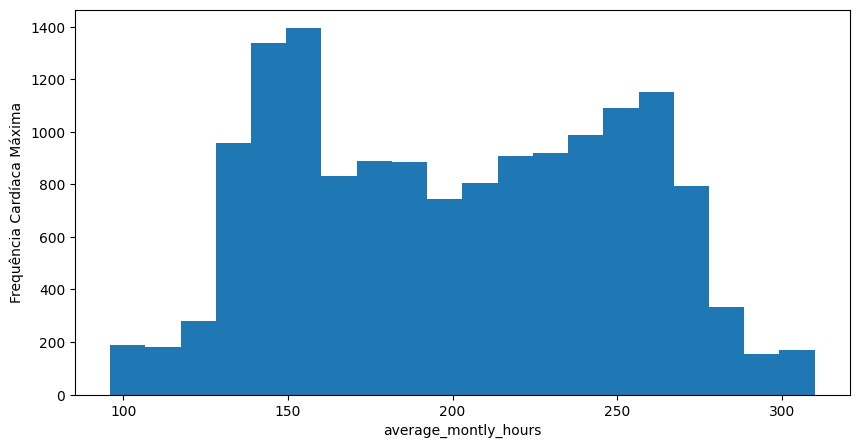

In [133]:
plt.figure(figsize=(10,5))
plt.hist('average_montly_hours', data=df, bins=20)
plt.xlabel('average_montly_hours')
plt.ylabel('Frequência Cardíaca Máxima')
plt.show() 

8. Qual departamento registrou a maior média de horas trabalhadas por funcionário e qual foi o número médio de projetos executados por funcionário nesse departamento?

In [97]:
df.groupby('department')['average_montly_hours'].mean()

department
0    200.911353
1    201.162973
2    198.684709
3    202.497426
4    200.758188
5    201.249206
6    202.215974
7    199.965632
8    199.385781
9    200.800508
Name: average_montly_hours, dtype: float64

In [98]:
df.query('department == 3')['number_project'].mean()

3.8779411764705882

Resposta: Technical (3) - 3.87 (média de projetos)
***

9. Elabore um gráfico de boxplot que represente a distribuição da média de horas trabalhadas de todos os profissionais do departamento TI, classificados de acordo com seu salário. Após isso, assinale a alternativa que melhor representa o resultado gerado.



In [112]:
# Filtrando pelo departamento de TI.
dfQuestion9 = df.query('department == 6')

data = [[dfQuestion9.query('salary == 2'), 
        dfQuestion9.query('salary == 1'), 
        dfQuestion9.query('salary == 0')]]
data

[[       satisfaction_level  last_evaluation  number_project  \
  1281                 0.75             0.88               5   
  1359                 0.46             0.46               2   
  1437                 0.40             0.53               2   
  1515                 0.72             0.99               5   
  3192                 0.49             0.76               5   
  ...                   ...              ...             ...   
  13191                0.77             0.59               4   
  13479                0.49             0.77               3   
  13812                0.53             0.66               3   
  13911                0.70             0.88               3   
  13918                0.43             0.66               4   
  
         average_montly_hours  time_spend_company  Work_accident  left  \
  1281                    270                   5              0     1   
  1359                    145                   3              0     1   
  1437 

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

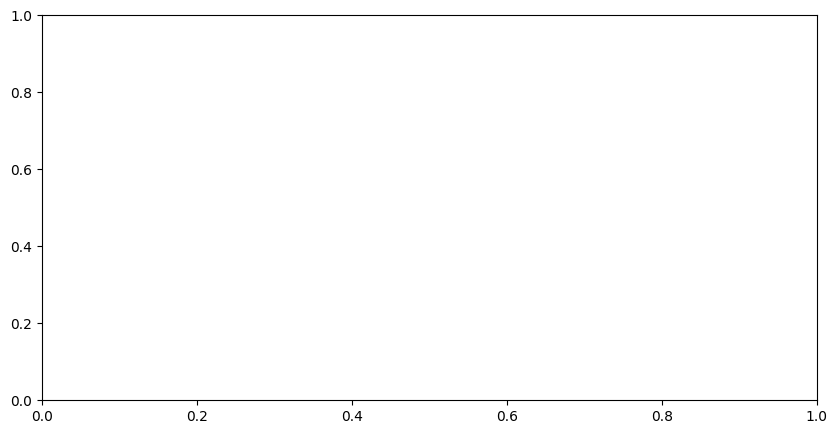

In [113]:

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.boxplot(data, notch ='True', vert = 0)
ax.set_yticklabels(['low', 'medium', 'high'])

plt.title("Customized box plot")
plt.xlabel('average_montly_hours')
plt.ylabel('Salary')
plt.show() 

***

10. Após a aplicação do algoritmo RandomForestClassifier, qual feature demonstra a maior importância no contexto dos dados analisados?

In [78]:
pd.DataFrame(modelo.feature_importances_, columns=['Importancia'], 
             index = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 
                      'Work_accident', 'promotion_last_5years', 'department',
                      'salary']).sort_values('Importancia', ascending=False)

,Importancia
satisfaction_level,0.290331
time_spend_company,0.251085
number_project,0.161145
average_montly_hours,0.149383
last_evaluation,0.116249
department,0.015429
salary,0.009675
Work_accident,0.005782
promotion_last_5years,0.000922


Resposta: satisfaction_level

***

11. Gere a pontuação (score) do modelo criado e selecione a opção que melhor reflete a aproximação desse score.

In [79]:
print('Precisão(%): ', acuraria)

Precisão(%):  0.9881796690307328


Resposta: Acima de 98%
***

12. Elabore a matriz de confusão para o modelo desenvolvido e, com base na análise dessa matriz e do relatório de classificação (classification_report), responda às demais questões: 

Qual foi a precisão associada foi classe não permaneceu?

In [82]:
cm

array([[1086,   10],
       [  15, 1004]], dtype=int64)

In [88]:
# Gerar o relatóri de classificação
report = classification_report(y_test, y_pred)
# Imprimir relatório de classificação
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1096
           1       0.99      0.99      0.99      1019

    accuracy                           0.99      2115
   macro avg       0.99      0.99      0.99      2115
weighted avg       0.99      0.99      0.99      2115



***

13. Qual é a quantidade de registros que o modelo acertou para a classe que permaneceu na empresa?

In [84]:
# Exibindo dados da matriz de confusão
cm

array([[1086,   10],
       [  15, 1004]], dtype=int64)

Resposta: 1086
***

14. Qual foi o recall que o modelo obteve para a classe permaneceu?

In [89]:
# Imprimir relatório de classificação
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1096
           1       0.99      0.99      0.99      1019

    accuracy                           0.99      2115
   macro avg       0.99      0.99      0.99      2115
weighted avg       0.99      0.99      0.99      2115



Resposta: 0.99

***

15. Qual classe possui maior valor de suporte?

In [86]:
# Imprimir relatório de classificação
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1096
           1       0.99      0.99      0.99      1019

    accuracy                           0.99      2115
   macro avg       0.99      0.99      0.99      2115
weighted avg       0.99      0.99      0.99      2115



Resposta: aqui que permaneceu (0) = 1096